### Firstly we want import the Python libraries we want to use for our analysis:


In [1]:
# for handling data tables (reading csv files) 
import pandas as pd

import numpy as np

# library for network data
import networkx as nx

# and for creating images
import matplotlib.pyplot as plt

### We will load two csv files, one containing edges, and the next with information about the nodes


In [48]:
df_nodes = pd.read_csv('./letters_data/Letters_nodes.csv',
                       index_col=0)

In [49]:
df_nodes

,letterID,First_Name,Surname,Military/Civilian,Rank,Civilian_Career,Subnet
ID,,,,,,,
1,a,Amelia,Anderson,Military,Private,NaN,1
2,b,Benjamin,Brown,Military,Private,NaN,1
3,c,Chloe,Carter,Military,Lance Corporal,NaN,1
4,d,Daniel,Davis,Military,Private,NaN,1
5,e,Emily,Evans,Military,Corporal,NaN,1
6,f,Finn,Foley,Military,Sergeant,NaN,1
7,g,Grace,Green,Military,Sergeant,NaN,1
8,h,Harry,Hall,Civilian,NaN,Farmer,2
9,i,Isabella,Jackson,Civilian,NaN,Teacher,2


In [50]:
# load in the list of edges
df_edges = pd.read_csv('./letters_data/Letters_edges.csv', index_col=None)
df_edges           

,source,target,weights
0,1,2,16
1,1,3,43
2,1,4,60
3,1,5,0
4,1,6,0
...,...,...,...
320,23,25,0
321,23,26,0
322,24,25,0
323,24,26,0


In [51]:
# There appear to be many edges with weight = 0. These can be removed by keeping a subset of the orginal dataframe 
# those rows with weight that does not equal 0

df_edges = df_edges[df_edges['weights']!=0]
                                     

In [52]:

df_edges.shape


(40, 3)

### We can now use the networkx library to build an undirected network (Graph)

In [53]:
G = nx.from_pandas_edgelist(df=df_edges,
                           source='source',
                           target='target',
                           edge_attr='weights')

In [54]:
print(G)

Graph with 26 nodes and 40 edges


In [71]:
nx.average_shortest_path_length(G)

4.2553846153846155

In [56]:
df_nodes.columns

Index(['letterID', 'First_Name', 'Surname', 'Military/Civilian', 'Rank',
       'Civilian_Career', 'Subnet'],
      dtype='object')

In [57]:
df_nodes['full_name'] = df_nodes.First_Name.str.cat(df_nodesA['Surname'])

df_nodes.columns

Index(['letterID', 'First_Name', 'Surname', 'Military/Civilian', 'Rank',
       'Civilian_Career', 'Subnet', 'full_name'],
      dtype='object')

In [58]:
# Add some more data to the nodes in the network graph

nx.set_node_attributes(G, pd.Series(df_nodes.full_name, index=df_nodes.index).to_dict(), 'full_name')
nx.set_node_attributes(G, pd.Series(df_nodes['Military/Civilian'], index=df_nodes.index).to_dict(), 'Military/Civilian')
nx.set_node_attributes(G, pd.Series(df_nodes.Rank, index=df_nodes.index).to_dict(), 'Rank')
nx.set_node_attributes(G, pd.Series(df_nodes.Civilian_Career, index=df_nodes.index).to_dict(), 'Civilian_Career')


In [59]:
G.nodes[3]


{'full_name': ' Chloe  Carter ',
 'Military/Civilian': ' Military ',
 'Rank': ' Lance Corporal ',
 'Civilian_Career': nan}

In [60]:
print(G)

Graph with 26 nodes and 40 edges


In [61]:
print(G)
print(nx.number_connected_components(G), "connected components")

Graph with 26 nodes and 40 edges
1 connected components


In [62]:
G.name = 'first war-letters network'

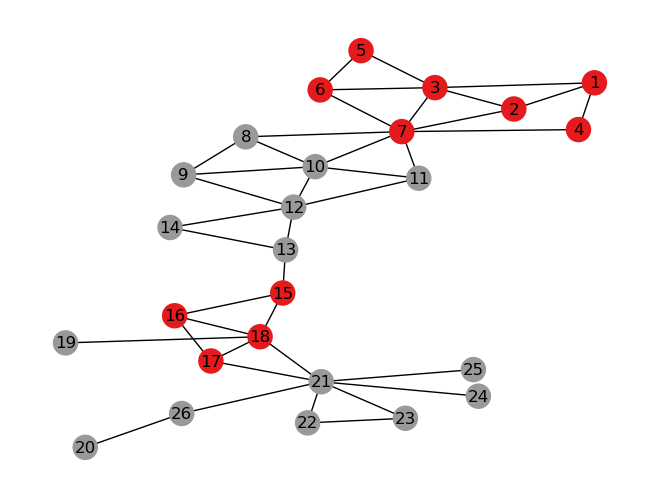

In [70]:
nx.draw_kamada_kawai(G,
                     node_color=df_nodes.Subnet,
                    cmap=plt.cm.Set1,
                    with_labels=True)

In [55]:
nx.betweenness_centrality(G)

{1: 0.0044444444444444444,
 2: 0.022222222222222237,
 3: 0.06944444444444448,
 4: 0.022222222222222237,
 7: 0.3922222222222222,
 5: 0.0,
 6: 0.03444444444444445,
 8: 0.011666666666666667,
 10: 0.21500000000000002,
 11: 0.17500000000000002,
 9: 0.025,
 12: 0.515,
 13: 0.52,
 14: 0.0,
 15: 0.5133333333333334,
 16: 0.025,
 18: 0.4666666666666667,
 17: 0.011666666666666667,
 21: 0.42333333333333334,
 19: 0.0,
 20: 0.0,
 26: 0.08,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0}